#  Инициализация и настройка

#  Импорт библиотек

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint
from IPython.display import clear_output

#  Загрузка данных

In [3]:
train = pd.read_csv(r'fashion-mnist_train.csv')

In [4]:
test = pd.read_csv(r'fashion-mnist_test.csv')

In [5]:
x_train = train.drop('label', axis=1)/255
y_train = train.label
x_test = test.drop('label', axis=1)/255
y_test = test.label

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [7]:
y_train_labels = enc.fit_transform(np.reshape(np.array(y_train), (-1,1))).toarray()
y_test_labels = enc.transform(np.reshape(np.array(y_test), (-1,1))).toarray()

In [8]:
x_TRAIN, x_VALID, y_TRAIN, y_VALID = train_test_split(x_train, y_train_labels, test_size = 0.2, random_state=42)

# 1. Логистическая регрессия

In [20]:
model_log = Sequential()
model_log.add(Dense(10, input_shape=(784,), activation='softmax'))
model_log.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])        
history = model_log.fit(x_TRAIN.values, y_TRAIN, validation_data=(x_VALID.values, y_VALID), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8670 - accuracy: 0.7295 - val_loss: 0.6602 - val_accuracy: 0.7852
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6149 - accuracy: 0.8004 - val_loss: 0.5821 - val_accuracy: 0.8062
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5621 - accuracy: 0.8156 - val_loss: 0.5517 - val_accuracy: 0.8123
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5335 - accuracy: 0.8240 - val_loss: 0.5280 - val_accuracy: 0.8200
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5149 - accuracy: 0.8277 - val_loss: 0.5140 - val_accuracy: 0.8217
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5009 - accuracy: 0.8316 - val_loss: 0.5014 - val_accuracy: 0.8266
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4907 - accuracy: 0.8348 - val_loss: 0.4946 - val_accuracy:

Text(0.5, 1.0, 'Логистическая регрессия')

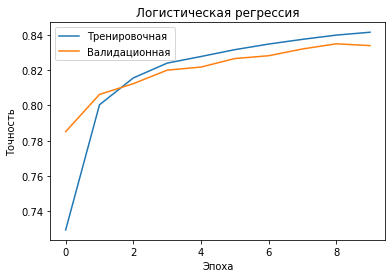

In [21]:
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировочная', 'Валидационная'])
plt.title('Логистическая регрессия')

In [22]:
_, score = model_log.evaluate(x_test.values, y_test_labels)
clear_output()
print("Точность логической регрессии на тестовой выборке: {0:.3f}".format(score))

Точность логической регрессии на тестовой выборке: 0.844


# 2. Полносвязная нейронная сеть

In [23]:
model_nn = Sequential()
model_nn.add(Dense(32, activation='relu', input_shape=(784,)))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(10, activation='softmax'))

model_nn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_nn = model_nn.fit(x_TRAIN.values, y_TRAIN, validation_data=(x_VALID.values, y_VALID), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8899 - accuracy: 0.6934 - val_loss: 0.5952 - val_accuracy: 0.7946
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5547 - accuracy: 0.8077 - val_loss: 0.5406 - val_accuracy: 0.8075
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.8268 - val_loss: 0.4770 - val_accuracy: 0.8286
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4686 - accuracy: 0.8366 - val_loss: 0.4677 - val_accuracy: 0.8331
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4485 - accuracy: 0.8434 - val_loss: 0.4650 - val_accuracy: 0.8308
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4336 - accuracy: 0.8471 - val_loss: 0.4346 - val_accuracy: 0.8447
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4207 - accuracy: 0.8521 - val_loss: 0.4208 - val_accuracy:

Text(0.5, 1.0, 'Полносвязная нейронная сеть')

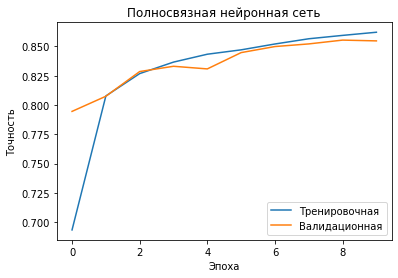

In [24]:
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировочная', 'Валидационная'])
plt.title('Полносвязная нейронная сеть')

In [25]:
_, score = model_nn.evaluate(x_test.values, y_test_labels)
clear_output()
print("Точность полносвязной нейронной сети на тестовой выборке : {0:.3f}".format(score))

Точность полносвязной нейронной сети на тестовой выборке : 0.859


# 3. Свёрточная нейронная сеть

In [9]:
x_TRAIN_reshaped = x_TRAIN.values.reshape(len(x_TRAIN.values), 28, 28, 1)
x_VALID_reshaped = x_VALID.values.reshape(len(x_VALID.values), 28, 28, 1)
x_TEST_reshaped = x_test.values.reshape(len(x_test.values), 28, 28, 1)

Используются слои суб-дискретизации

In [26]:
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Convolution2D(32,
                                              kernel_size=(3,3), 
                                              input_shape=(28, 28, 1), 
                                              activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(32, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn1 = model_cnn.fit(x_TRAIN_reshaped, y_TRAIN, validation_data=(x_VALID_reshaped, y_VALID), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.7759 - accuracy: 0.7265 - val_loss: 0.5280 - val_accuracy: 0.8085
Epoch 2/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.5213 - accuracy: 0.8100 - val_loss: 0.5383 - val_accuracy: 0.7917
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4696 - accuracy: 0.8325 - val_loss: 0.4476 - val_accuracy: 0.8416
Epoch 4/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.4326 - accuracy: 0.8453 - val_loss: 0.4175 - val_accuracy: 0.8544
Epoch 5/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4047 - accuracy: 0.8564 - val_loss: 0.3948 - val_accuracy: 0.8568
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3829 - accuracy: 0.8646 - val_loss: 0.3965 - val_accuracy: 0.8649
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3631 - accuracy: 0.8728 - val_loss: 0.3704 -

Text(0.5, 1.0, 'Свёрточная нейронная сеть')

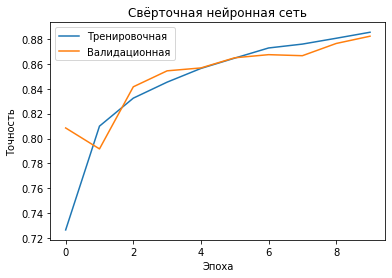

In [27]:
plt.plot(history_cnn1.history['accuracy'])
plt.plot(history_cnn1.history['val_accuracy'])
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировочная', 'Валидационная'])
plt.title('Свёрточная нейронная сеть')

In [28]:
_, score = model_cnn.evaluate(x_TEST_reshaped, y_test_labels)
clear_output()
print("Сверточная нейронная сеть точность на тестовой выборке: {0:.3f}".format(score))

Сверточная нейронная сеть точность на тестовой выборке: 0.887


Добавим слоёв

In [29]:
model_cnn_ext = tf.keras.models.Sequential()
model_cnn_ext.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_ext.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_ext.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_ext.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_ext.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_ext.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_ext.add(tf.keras.layers.Flatten())
model_cnn_ext.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_ext.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_ext.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_ext.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
    
history_cnn2 = model_cnn_ext.fit(x_TRAIN_reshaped, y_TRAIN, validation_data=(x_VALID_reshaped, y_VALID), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 125s 83ms/step - loss: 1.0121 - accuracy: 0.6367 - val_loss: 0.5968 - val_accuracy: 0.7803
Epoch 2/10
1500/1500 [==============================] - 122s 81ms/step - loss: 0.5390 - accuracy: 0.7989 - val_loss: 0.4942 - val_accuracy: 0.8181
Epoch 3/10
1500/1500 [==============================] - 117s 78ms/step - loss: 0.4635 - accuracy: 0.8310 - val_loss: 0.4465 - val_accuracy: 0.8370
Epoch 4/10
1500/1500 [==============================] - 132s 88ms/step - loss: 0.4181 - accuracy: 0.8492 - val_loss: 0.4010 - val_accuracy: 0.8545
Epoch 5/10
1500/1500 [==============================] - 126s 84ms/step - loss: 0.3895 - accuracy: 0.8604 - val_loss: 0.3867 - val_accuracy: 0.8606
Epoch 6/10
1500/1500 [==============================] - 116s 77ms/step - loss: 0.3643 - accuracy: 0.8680 - val_loss: 0.3619 - val_accuracy: 0.8733
Epoch 7/10
1500/1500 [==============================] - 133s 88ms/step - loss: 0.3463 - accuracy: 0.8739 - val_loss: 0

Text(0.5, 1.0, 'Свёрточная нейронная сеть с большим кол-вом слоёв')

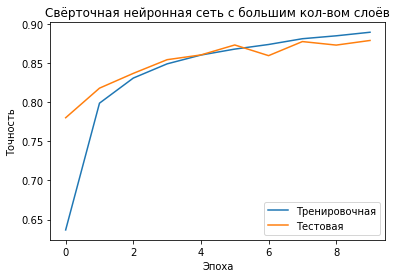

In [30]:
plt.plot(history_cnn2.history['accuracy'])
plt.plot(history_cnn2.history['val_accuracy'])
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировочная', 'Тестовая'])
plt.title('Свёрточная нейронная сеть с большим кол-вом слоёв')

In [31]:
_, score = model_cnn_ext.evaluate(x_TEST_reshaped, y_test_labels)
clear_output()
print("Точность Сверточной нейронной сети с большим кол-вом слоёв на выборке: {0:.3f}".format(score))

Точность Сверточной нейронной сети с большим кол-вом слоёв на выборке: 0.878


С увеличением кол-ва слоёв мы не наблюдаем прироста точности на тестовой выборке

# Добавим Batch Normalization слои

In [10]:
model_cnn_batch = tf.keras.models.Sequential()
model_cnn_batch.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_batch.add(tf.keras.layers.BatchNormalization())
model_cnn_batch.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_batch.add(tf.keras.layers.BatchNormalization())
model_cnn_batch.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_batch.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_batch.add(tf.keras.layers.BatchNormalization())
model_cnn_batch.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_batch.add(tf.keras.layers.BatchNormalization())
model_cnn_batch.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_batch.add(tf.keras.layers.Flatten())
model_cnn_batch.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_batch.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_batch.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_batch.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn3 = model_cnn_batch.fit(x_TRAIN_reshaped, y_TRAIN, validation_data=(x_VALID_reshaped, y_VALID), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 183s 122ms/step - loss: 0.4574 - accuracy: 0.8349 - val_loss: 0.4220 - val_accuracy: 0.8464
Epoch 2/10
1500/1500 [==============================] - 201s 134ms/step - loss: 0.2992 - accuracy: 0.8895 - val_loss: 0.2987 - val_accuracy: 0.8896
Epoch 3/10
1500/1500 [==============================] - 215s 143ms/step - loss: 0.2498 - accuracy: 0.9072 - val_loss: 0.2852 - val_accuracy: 0.8970
Epoch 4/10
1500/1500 [==============================] - 219s 146ms/step - loss: 0.2200 - accuracy: 0.9198 - val_loss: 0.2683 - val_accuracy: 0.9025
Epoch 5/10
1500/1500 [==============================] - 225s 150ms/step - loss: 0.1928 - accuracy: 0.9303 - val_loss: 0.3045 - val_accuracy: 0.8939
Epoch 6/10
1500/1500 [==============================] - 216s 144ms/step - loss: 0.1726 - accuracy: 0.9369 - val_loss: 0.2865 - val_accuracy: 0.8953
Epoch 7/10
1500/1500 [==============================] - 249s 166ms/step - loss: 0.1513 - accuracy: 0.9453 - val_

Text(0.5, 1.0, 'Свёрточная нейронная сеть с добавленными Batch Normalization слоями')

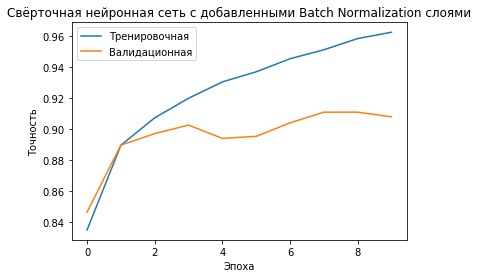

In [11]:
plt.plot(history_cnn3.history['accuracy'])
plt.plot(history_cnn3.history['val_accuracy'])
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировочная', 'Валидационная'])
plt.title('Свёрточная нейронная сеть с добавленными Batch Normalization слоями')

In [13]:
_, score = model_cnn_batch.evaluate(x_TEST_reshaped, y_test_labels)
clear_output()
print("Точность свёрточной нейронной сети с добавленными Batch Normalization слоями: {0:.3f}".format(score))

Точность свёрточной нейронной сети с добавленными Batch Normalization слоями: 0.915


Имеем прирост в точности

# Сравниваем результаты

In [33]:
_, score_log = model_log.evaluate(x_test.values, y_test_labels)
_, score_nn = model_nn.evaluate(x_test.values, y_test_labels)
_, score_cnn = model_cnn.evaluate(x_TEST_reshaped, y_test_labels)
_, score_cnn_more = model_cnn_ext.evaluate(x_TEST_reshaped, y_test_labels)
_, score_cnn_batch = model_cnn_batch.evaluate(x_TEST_reshaped, y_test_labels)
clear_output()

print("Точность логической регрессии на тестовой выборке:                            {0:.2%}".format(score_log))
print("Точность полносвязной нейронной сети на тестовой выборке :                    {0:.2%}".format(score_nn))
print("Сверточная нейронная сеть точность на тестовой выборке:                       {0:.2%}".format(score_cnn))
print("Точность Сверточной нейронной сети с большим кол-вом слоёв на выборке:        {0:.2%}".format(score_cnn_more))
print("Точность свёрточной нейронной сети с добавленными Batch Normalization слоями: {0:.2%}".format(score_cnn_batch))

Точность логической регрессии на тестовой выборке:                            84.39%
Точность полносвязной нейронной сети на тестовой выборке :                    85.86%
Сверточная нейронная сеть точность на тестовой выборке:                       88.66%
Точность Сверточной нейронной сети с большим кол-вом слоёв на выборке:        87.79%
Точность свёрточной нейронной сети с добавленными Batch Normalization слоями: 91.49%


In [34]:
def prn_graph(df, title):
    plt.plot(df['accuracy'])
    plt.plot(df['val_accuracy'])
    plt.ylabel('Точность')
    plt.xlabel('Эпоха')
    plt.legend(['Тренировочная', 'Валидационная'])
    plt.title(title)
    plt.show() 

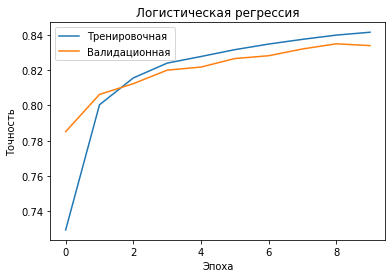

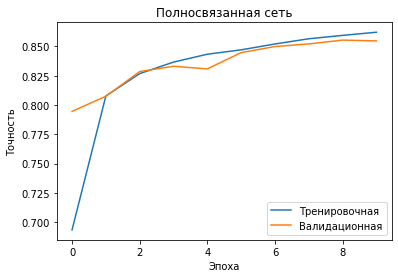

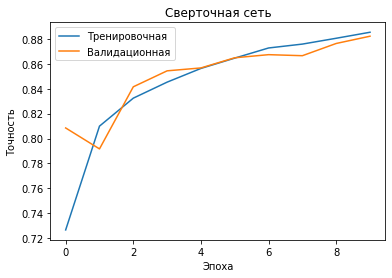

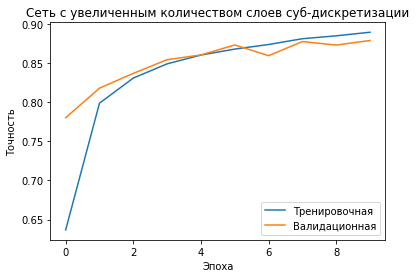

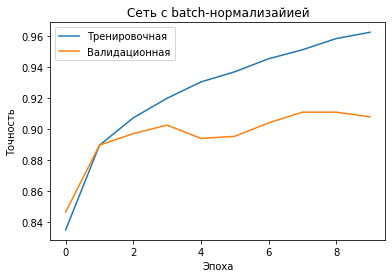

In [35]:
prn_graph(history.history, 'Логистическая регрессия')
prn_graph(history_nn.history, 'Полносвязанная сеть')
prn_graph(history_cnn1.history, 'Сверточная сеть')
prn_graph(history_cnn2.history, 'Сеть с увеличенным количеством слоев суб-дискретизации')
prn_graph(history_cnn3.history, 'Сеть с batch-нормализайией')